## Iniciar importando paquetes

In [3]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

## Montar Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Es importante verificar que "folder" contenta una ruta de tu drive donde
# esté guardada alguna imagen que se vaya a procesar, e.g. Lena
folder = '/content/drive/My Drive/Talleres/2023 Semana Ingeniería CNN/'

Mounted at /content/drive


# Filtrado espacial de imágenes
El filtrado de imágenes en el dominio espacial consiste en métodos para modificar una imagen, de modo que al procesarla sea posible resaltar o disminuir, de forma selectiva, algunas características de la imagen. En este sentido, los filtros de suavizado son propios para disminuir el ruido o características poco deseables en una imagen, mientras que los filtros de agudizado permiten precisamente resaltar las características deseables. También en este apartado entran los filtros para obtención de contornos.

El proceso de filtrado consiste en aplicar la operación de convolución en dos dimensiones, entre la imagen a procesar y una matriz de tamaño $N\times N$ comúnmente llamada <i>máscara</i>, <i>kernel</i>, <i>vecindad o neighborhood</i>, o bien simplemente <i>filtro</i>. De forma regular, el tamaño de esta máscara es pequeño en comparación con la imagen; es normal que se apliquen máscaras de tamaño 3x3 o 5x5, aunque pueden ser también de mayor tamaño. Los valores con los que se crean las máscaras o kernels se eligen dependiendo el tipo de filtrado que se desee. Es decir, de la elección de los valores contenidos en la máscara dependerá lo que se obtiene en la imagen resultante. De forma general, la operación para el filtrado consiste en una transformación sobre los pixeles de la imagen dada por:
<br>
<center>
<!-- <img src="https://i.postimg.cc/tgXbChM8/cv-04-01.png" alt="Spatial Filtering"> -->

$\LARGE{g\left(x,y\right)=T\left[f\left(x,y\right)\right]}$
<br><b>Figura 1.</b> Filtrado espacial<br>
</center>
donde $f(x,y)$ representa la imagen de entrada, $g(x,y)$ es la imagen de salida, y $T$ es el operador en $f$ definido en una vecindad que circunda al pixel $(x,y)$. La operación de convolución entonces, define un operador $T$ para filtrado, que está representado formalmente como:

<br>
<center>
<!-- <img src="https://i.postimg.cc/jjZbWDV2/cv-04-02.png" alt="Convolution operator"> -->
$\LARGE{g\left(x,y\right)=\displaystyle\sum^N_{s=0}\sum^N_{t=0}w\left(s,t\right)\cdot f\left(x+s, y+t\right)}$
<br><b>Figura 2.</b> Operador de convolución<br>
</center>
donde $w(s,t)$ representa la máscara que se operará con la imagen.
La manera en cómo se lleva a cabo la operación de convolución se muestra en la imagen siguiente:

<br>
<center><img src="https://i.postimg.cc/8zGcMfYm/cv-04-03.png" alt="Convolution operation">
<br><b>Figura 3.</b> Operación de convolución<br>
</center>

Si viéramos paso a paso este proceso, sería como sigue:

<ol>
<li> Elegir la máscara
<br>
<center><img src="https://i.postimg.cc/cHCNfdZm/cv-04-04-A.png" alt="Seleccionar máscara">
<br><b>Figura 4A.</b> Seleccionar máscara<br>
</center>
<li> Colocar el centro de la máscara en el primer pixel de la imagen
<br>
<center><img src="https://i.postimg.cc/Hn7DP3r8/cv-04-04-B.png" alt="Colocar el centro de la máscara en el primer pixel de la imagen">
<br><b>Figura 4B.</b> Iniciar procesamiento<br>
</center>
<li> Realizar la operación sobre $f(x,y)$. La operación consiste en multiplicar cada uno de los valores de la máscara por el valor del pixel sobre el cual están puestos y posteriormente sumar los resultados de las multiplicaciones; el valor obtenido (sólo uno) se coloca en la imagen resultante en el mismo pixel donde está colocado el centro de la máscara. Note que a la imagen se le agregan pixeles para poder operarse con la máscara.
<br>
<center><img src="https://i.postimg.cc/cHzGmPLN/cv-04-04-C.png" alt="Colocar el centro de la máscara en el primer pixel de la imagen">
<br><b>Figura 4C.</b> Iniciar procesamiento<br>
</center>
<li> Continuar operando hasta llegar al último pixel de la imagen.
<br>
<center><img src="https://i.postimg.cc/BZ8j00DH/cv-04-04-D.png" alt="Realizar la operación sobre el pixel (i,j) de la imagen">
<br><b>Figura 4D.</b> Continuar procesamiento<br>
</center>

<br>
<center><img src="https://i.postimg.cc/JtVVwJX6/cv-04-04-E.png" alt="Realizar la operación sobre el último pixel de la imagen">
<br><b>Figura 4E.</b> Finalizar proceso<br>
</center>
</ol>

Como ejemplo de procesar un pixel, vea la imagen siguiente:
<br>
<!-- <center><img src="https://i.postimg.cc/ZY1CYMFg/cv-04-05.png" alt="Valor resultante en un pixel"> -->
<center><img src="https://i.postimg.cc/WpBt1mqq/Convoluci-n-ejemplo.png" alt="Valor resultante en un pixel" width=70%>
<br><b>Figura 5.</b> Valor resultante en un pixel<br>
</center>
img_result = (-1)*(10) + (-2)*(8) + (-1)*(6) +
<br>         (0)*(97) + (0)*(85) + (0)*(27) +
<br>         (1)*(56) + (2)*(13) + (1)*(0)

img_result = -10 - 16 - 6 + 0 + 0 + 0 + 56 + 26 + 0 = 50




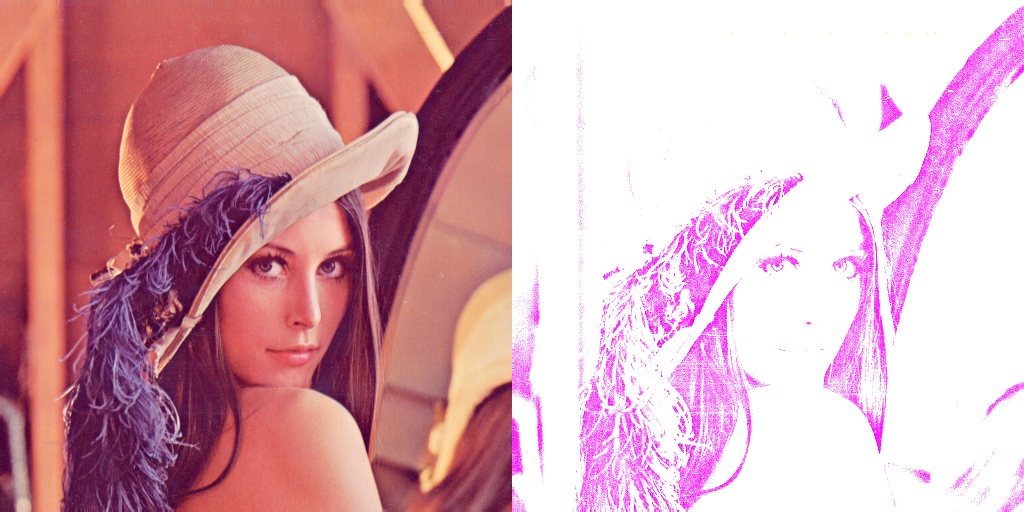

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(folder+'Ima/opencvlogo.png')
img = cv2.imread(folder+'Ima/lena_color_512.tif', 1)

N = 3
kernel1 = np.ones((N, N))/(N*N)
# print(kernel1)

kernel2 = np.array(([25, 7, 2], 
                   [5, 1, -30],
                   [-23, 0, 69]), dtype="float")

kernel3 = np.array(([0, 2, 1], 
                   [-2, 0, 1],
                   [-1, -1, 0]), dtype="float")

kernel4 = np.array(([1, 2, 1], 
                   [0, 0, 0],
                   [-1, -2, -1]), dtype="float")

kernel5 = np.array(([0, -1, 0], 
                   [-1, 10, -1],
                   [0, -1, 0]), dtype="int")

kernel6 = np.array(([0, 0, 0], 
                   [0, 1, 0],
                   [0, 0, 0]), dtype="int")

img_fil = cv2.filter2D(img, -1, kernel5)

imgs = np.array(np.hstack((img, img_fil)), dtype='uint8')
# Mostrar imágenes
cv2_imshow(imgs)
